In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import os.path
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dfcovid_ciudades = pd.read_csv(os.path.join('../Output', 'data_final.csv'))
#dfcovid_ciudades.head()

/home/oem/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#DataFrame de la ciudad de Medellín

dfmedellin=dfcovid_ciudades[dfcovid_ciudades['CODIGO DIVIPOLA']==5001]
dfmedellin.head()

,ID DE CASO,FECHA DE NOTIFICACION,CODIGO DIVIPOLA,CIUDAD DE UBICACION,DEPARTAMENTO O DISTRITO,ATENCION,EDAD,SEXO,TIPO,ESTADO,PAIS DE PROCEDENCIA,FIS,FECHA DE MUERTE,FECHA DIAGNOSTICO,FECHA RECUPERADO,FECHA REPORTE WEB,TIPO RECUPERACION,CODIGO DEPARTAMENTO,CODIGO PAIS
1,3,2020-03-07,5001,MEDELLIN,Antioquia,Recuperado,50,F,IMPORTADO,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0
2,4,2020-03-09,5001,MEDELLIN,Antioquia,Recuperado,55,M,RELACIONADO,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN
3,5,2020-03-09,5001,MEDELLIN,Antioquia,Recuperado,25,M,RELACIONADO,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN
13,20,2020-03-11,5001,MEDELLIN,Antioquia,Recuperado,26,F,RELACIONADO,Leve,NaN,2020-03-09T00:00:00.000,NaN,2020-03-14,2020-03-24,2020-03-14,PCR,5,NaN
14,21,2020-03-11,5001,MEDELLIN,Antioquia,Recuperado,28,M,RELACIONADO,Leve,NaN,2020-03-10T00:00:00.000,NaN,2020-03-14,2020-04-10,2020-03-14,PCR,5,NaN


In [4]:
#Casos confirmados para Medellín
dfm = pd.to_datetime(dfmedellin['FECHA REPORTE WEB'])
dfmedellin_nuevoscasos = dfm.groupby(dfm.dt.floor('d')).size().reset_index(name='Nuevos_Casos')
dfm2 = dfmedellin_nuevoscasos['FECHA REPORTE WEB']
dfmedellin_nuevoscasos.index = dfm2

In [6]:
resample = pd.concat([dfmedellin_nuevoscasos], axis=1)
resample['dayofweek'] = resample.index.dayofweek

#Senama
df_lun_dom = resample [resample.dayofweek.isin([0,1,2,3,4,5,6])].Nuevos_Casos


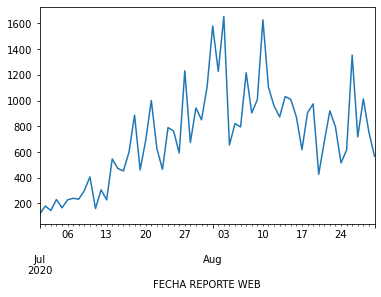

In [8]:
graf_1 = df_lun_dom.loc['2020-07-01':'2020-08-30']
graf_1.plot()

In [9]:
#conjunto de datos
x = df_lun_dom
# hacer la validación cruzada - x_train, x_test, y_test8dias, y_test15dias

In [12]:
# Modelo
modelo_sarima = SARIMAX(x, order=(0,1,1), seasonal_order=(0,1,1,7))

#Ajuste
resultado = modelo_sarima.fit()

resultado.aic

# algoritmo de entrenamiento

/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2059.0631823545127

In [13]:
predic_1 = resultado.get_forecast(steps=7*2).predicted_mean #prediga 14 dìas


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [14]:
predic_1

165    838.069929
166    733.147704
167    861.742330
168    649.219238
169    851.541297
170    851.876079
171    736.712564
172    861.026345
173    756.104120
174    884.698747
175    672.175654
176    874.497713
177    874.832495
178    759.668980
dtype: float64

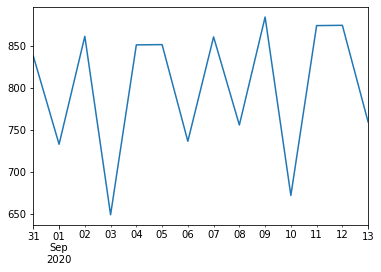

In [18]:
predic_1.index = pd.date_range(start='2020-08-31', end='2020-09-14', freq='d')[:-1]
predic_1.plot()

/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


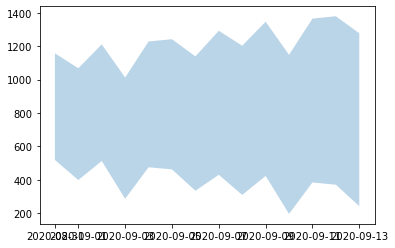

In [22]:
# bandas

band_1_conf = resultado.get_forecast(steps=7*2).conf_int() #por 2 dìas
band_1_conf.index = pd.date_range(start='2020-08-31', end = '2020-09-14', freq='d')[:-1]
x = pd.date_range(start='2020-08-31', end = '2020-09-14', freq='d')[:-1]
y1 = band_1_conf['lower FRECUENCIA']
y2 = band_1_conf['upper FRECUENCIA']
plt.fill_between(x, y1, y2, alpha=0.3)



In [21]:
band_1_conf 

,lower FRECUENCIA,upper FRECUENCIA
2020-08-31,518.960935,1157.178922
2020-09-01,398.794835,1067.500573
2020-09-02,512.810947,1210.673713
2020-09-03,286.294833,1012.143644
2020-09-04,475.143584,1227.939011
2020-09-05,462.470956,1241.281202
2020-09-06,334.720679,1138.704450
2020-09-07,430.305543,1291.747146
2020-09-08,309.784413,1202.423828
2020-09-09,423.307208,1346.090285


In [7]:
#Clasificación para el DataFrame de casos confirmados de la ciudad de Medellín

from sklearn.model_selection import train_test_split

x = dfmedellin_confirmados.drop(columns = ['FRECUENCIA'])
y = dfmedellin_confirmados['FRECUENCIA']
x_medellin_confirmados_train, x_medellin_confirmados_test, y_medellin_confirmados_train, y_medellin_confirmados_test = train_test_split(x, y, test_size=0.3, random_state=15)
print(x_medellin_confirmados_train.shape)
print(x_medellin_confirmados_test.shape)

(115, 1)
(50, 1)
